# Assignment Python
Natasya Yonike Ambarita PYTN-KS07-013

# Project Overview

## Tentang Data

Menggunakan Kumpulan Data Penjualan Properti NYC dari Kaggle. 

Kumpulan data ini adalah catatan dari setiap bangunan atau unit bangunan (apartemen, dll.) yang dijual di pasar properti Kota New York selama periode 12 bulan.

Dataset ini berisi lokasi, alamat, tipe, harga jual, dan tanggal penjualan unit bangunan yang terjual. Referensi di bidang yang lebih rumit:
- BOROUGH: Kode digit untuk borough tempat properti berada; agar ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
- BLOCK; LOT: Kombinasi borough, blok, dan lot membentuk kunci unik untuk properti di New York City. Biasa disebut BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: Jenis bangunan pada berbagai titik waktu.

## Informasi Atribut

1. Unnamed: 0                      
2. BOROUGH    
3. NEIGHBORHOOD                    
4. BUILDING CLASS CATEGORY         
5. TAX CLASS AT PRESENT            
6. BLOCK                           
7. LOT                              
8. EASE-MENT                       
9. BUILDING CLASS AT PRESENT       
10. ADDRESS                         
11. APARTMENT NUMBER                
12. ZIP CODE                         
13. RESIDENTIAL UNITS                
14. COMMERCIAL UNITS                 
15. TOTAL UNITS                     
16. LAND SQUARE FEET                
17. GROSS SQUARE FEET               
18. YEAR BUILT                       
19. TAX CLASS AT TIME OF SALE       
20. BUILDING CLASS AT TIME OF SALE  
21. SALE PRICE                      
22. SALE DATE      

## Objektif Yang Harus Dicapai

Lakukan metode statistik kepada dataset, seperti Central Tendencies, Intervals, Hypotesis Testing, dan semua metode statistik yang telah kamu pelajari dalam course ini. 

Code Review:
- Measure of Central Tendency: Mean
- Measure of Central Tendency: Median
- Measure of Central Tendency: Modus
- Measure of Spread: Range
- Measure of Spread: Variance
- Measure of Spread: Standard Deviation
- Probability Distribution
- Confidence Intervals
- Hypothesis Testing
- Preprocessing
- Kode berjalan tanpa error

Readability:
- Tertata Dengan Baik

Analysis:
- Overall Analysis	

# Impor Library

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

from scipy.stats import t
import matplotlib.pyplot as plt
from IPython.display import Math, Latex
from IPython.core.display import Image

%matplotlib inline

import seaborn as sns

# Impor Dataset

In [2]:
df = pd.read_csv('nyc-rolling-sales.csv')
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


## Deskripsi Dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [4]:
df.shape

(84548, 22)

# Data Cleaning and Processing

### Cek Missing Value

In [5]:
df.isnull().sum().sum()

0

Kesimpulan:
Output diatas disimpulkan bahwa jumlah Missing Value pada dataset adalah 0

### Cek Duplikat Data

In [6]:
df.duplicated().sum()

0

Kesimpulan:
Output diatas disimpulkan bahwa jumlah data duplikat pada dataset adalah 0

### Menghapus kolom yang tidak dipakai

In [7]:
df.drop(['Unnamed: 0', 'NEIGHBORHOOD','BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE'], axis=1, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   BUILDING CLASS CATEGORY         84548 non-null  object
 2   TAX CLASS AT PRESENT            84548 non-null  object
 3   BUILDING CLASS AT PRESENT       84548 non-null  object
 4   RESIDENTIAL UNITS               84548 non-null  int64 
 5   COMMERCIAL UNITS                84548 non-null  int64 
 6   TOTAL UNITS                     84548 non-null  int64 
 7   LAND SQUARE FEET                84548 non-null  object
 8   GROSS SQUARE FEET               84548 non-null  object
 9   YEAR BUILT                      84548 non-null  int64 
 10  TAX CLASS AT TIME OF SALE       84548 non-null  int64 
 11  BUILDING CLASS AT TIME OF SALE  84548 non-null  object
 12  SALE PRICE                      84548 non-null

### Mengubah tipe data kolom

In [9]:
cat = ['TAX CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE']

for col in cat:
    df[col] = df[col].astype('str')

In [10]:
numeric = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

for col in numeric:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         84548 non-null  int64  
 1   BUILDING CLASS CATEGORY         84548 non-null  object 
 2   TAX CLASS AT PRESENT            84548 non-null  object 
 3   BUILDING CLASS AT PRESENT       84548 non-null  object 
 4   RESIDENTIAL UNITS               84548 non-null  int64  
 5   COMMERCIAL UNITS                84548 non-null  int64  
 6   TOTAL UNITS                     84548 non-null  int64  
 7   LAND SQUARE FEET                58296 non-null  float64
 8   GROSS SQUARE FEET               56936 non-null  float64
 9   YEAR BUILT                      84548 non-null  int64  
 10  TAX CLASS AT TIME OF SALE       84548 non-null  object 
 11  BUILDING CLASS AT TIME OF SALE  84548 non-null  object 
 12  SALE PRICE                      

### Cek Missing Value

In [12]:
df.isnull().sum()

BOROUGH                               0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BUILDING CLASS AT PRESENT             0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Kesimpulan:
Output diatas disimpulkan bahwa terdapat Missing Value pada 3 kolom, yaitu: LAND SQUARE FEET, GROSS SQUARE FEET, SALE PRICE

### Menghapus Missing Value

In [13]:
df.dropna(axis=0, inplace=True)

In [14]:
df.isnull().sum()

BOROUGH                           0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BUILDING CLASS AT PRESENT         0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

### Cek Duplikat Data

In [15]:
df.duplicated().sum()

1023

### Menghapus data duplikat

In [16]:
#first= menganggap nilai pertama sebagai unik dan sisanya dari nilai yang sama sebagai duplikat.
df_final = df.drop_duplicates(keep='first', inplace=False)

In [17]:
df_final.duplicated().sum()

0

Setelah tidak ada Missing Value dan Data yang duplikat, proses dapat dilanjutkan

### Cek Outliers

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84547
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         48244 non-null  int64  
 1   BUILDING CLASS CATEGORY         48244 non-null  object 
 2   TAX CLASS AT PRESENT            48244 non-null  object 
 3   BUILDING CLASS AT PRESENT       48244 non-null  object 
 4   RESIDENTIAL UNITS               48244 non-null  int64  
 5   COMMERCIAL UNITS                48244 non-null  int64  
 6   TOTAL UNITS                     48244 non-null  int64  
 7   LAND SQUARE FEET                48244 non-null  float64
 8   GROSS SQUARE FEET               48244 non-null  float64
 9   YEAR BUILT                      48244 non-null  int64  
 10  TAX CLASS AT TIME OF SALE       48244 non-null  object 
 11  BUILDING CLASS AT TIME OF SALE  48244 non-null  object 
 12  SALE PRICE                      

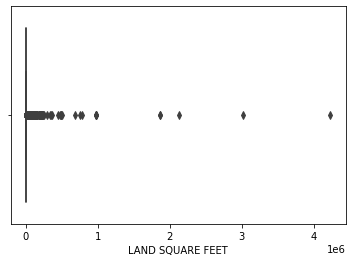

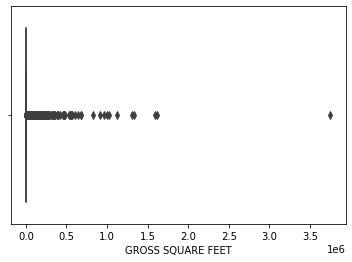

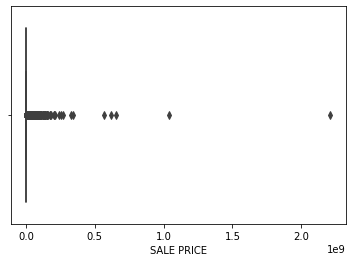

In [19]:
for col in df.select_dtypes(include=float).columns:
    plt.figure()
    sns.boxplot(x=df[col])
plt.show()

Kesimpulan: Output diatas menampilkan hasil cek outlier pada kolom dengan tipe data float. Pada kolom LAND SQUARE FEET, GROSS SQUARE FEET, dan SALE PRICE terdapat banyak outliers yang berada di atas titik atas.

### Mengatasi Outliers menggunakan IQR 

In [20]:
Q1 = df[df.select_dtypes(include=float).columns].quantile(0.25)
Q3 = df[df.select_dtypes(include=float).columns].quantile(0.75)

IQR = Q3-Q1

In [21]:
minimum = Q1-(1.5*IQR)
maximum = Q3+(1.5*IQR)

In [22]:
more_than = df > maximum
lower_than = df < minimum

C:\Users\HP\AppData\Local\Temp\ipykernel_16344\341836737.py:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = df > maximum
C:\Users\HP\AppData\Local\Temp\ipykernel_16344\341836737.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = df < minimum


In [23]:
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

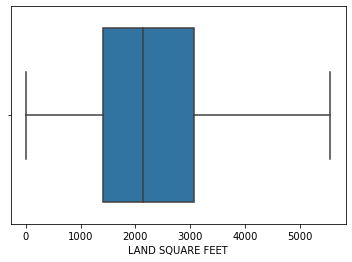

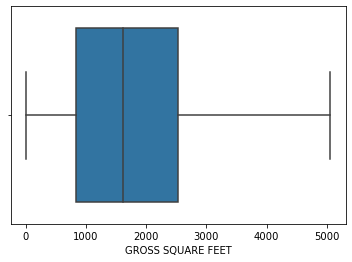

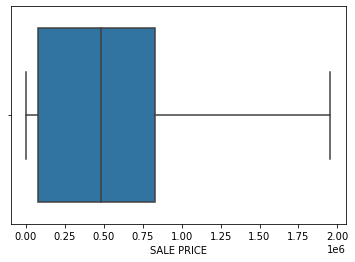

In [24]:
for col in df.select_dtypes(include=float).columns:
    plt.figure()
    sns.boxplot(x=df[col])
plt.show()

Kesimpulan: Output diatas menampilkan hasil cek outlier pada kolom dengan tipe data float. Pada kolom LAND SQUARE FEET, GROSS SQUARE FEET, dan SALE PRICE sudah tidak terdapat outliers.

### Cek Korelasi

<AxesSubplot:>

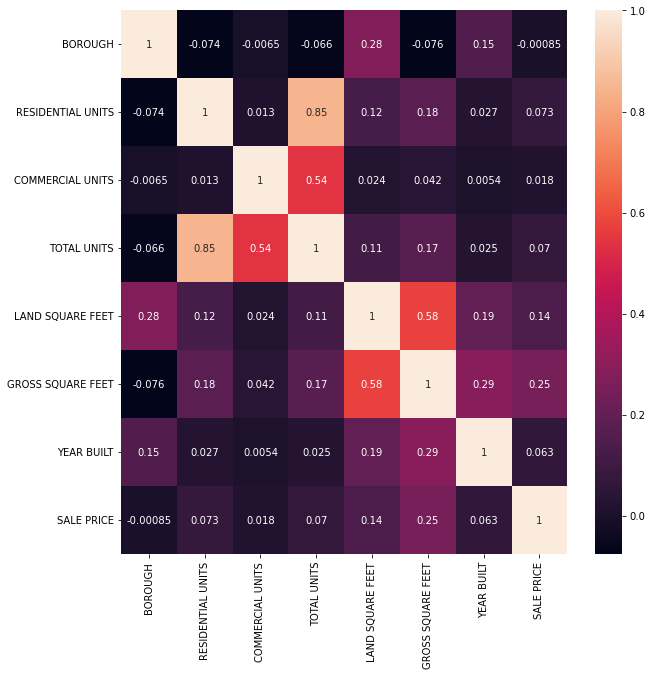

In [25]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True)

Kesimpulan: Output diatas menampilkan hubungan antar kolom:
- Terdapat korelasi negatif antara BOROUGH dan SALE PRICE sebesar -0.00085, yang artinya arah variabel ini beerlawanan
- Terdapat korelasi positif antara YEAR BUILT dan SALE PRICE sebesar 0.063, yang artinya hubungan variabel ini bergerak searah
- Untuk variabel dengan korelasi netral tidak mempengaruhi terhadap SALE PRICE

# Final Data

In [26]:
# Mengurutkan indeks sesuai dengan nomor baris
df.reset_index(inplace=True)
df.head()

,index,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,0,1,07 RENTALS - WALKUP APARTMENTS,2A,C2,5,0,5,1633.0,5058.0,1900,2,C2,1954370.0,2017-07-19 00:00:00
1,3,1,07 RENTALS - WALKUP APARTMENTS,2B,C4,10,0,10,2272.0,5058.0,1913,2,C4,1954370.0,2016-09-23 00:00:00
2,4,1,07 RENTALS - WALKUP APARTMENTS,2A,C2,6,0,6,2369.0,4615.0,1900,2,C2,1954370.0,2016-11-17 00:00:00
3,6,1,07 RENTALS - WALKUP APARTMENTS,2B,C4,8,0,8,1750.0,4226.0,1920,2,C4,1954370.0,2016-09-23 00:00:00
4,9,1,08 RENTALS - ELEVATOR APARTMENTS,2,D9,24,0,24,4489.0,5058.0,1920,2,D9,1954370.0,2016-11-07 00:00:00


In [27]:
df.shape

(48244, 15)

# Exploratory Data Analysis

## Measure of Central Tendency: Mean

In [28]:
df.groupby(['BOROUGH'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
BOROUGH,,,
1,3147.711730,4517.025845,1.638154e+06
2,2268.330118,1793.215208,3.541924e+05
3,1594.122510,1607.604774,5.730740e+05
4,3117.026990,1882.458296,6.947609e+05
5,3457.277844,1746.697275,5.111832e+05


Kesimpulan: Output diatas menampilkan nilai rata-rata dari luas dan harga jual properti di masing-masing wilayah yang ada di NYC

## Measure of Central Tendency: Median

In [49]:
df.groupby(['TAX CLASS AT PRESENT'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()

,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
TAX CLASS AT PRESENT,,,
,0.0,0.0,699125.0
1,2496.0,1824.0,497250.0
1A,0.0,0.0,342500.0
1B,2492.0,0.0,0.0
1C,0.0,0.0,782071.5
2,0.0,0.0,400000.0
2A,2500.0,3663.5,575000.0
2B,2500.0,5058.0,1100000.0
2C,0.0,0.0,700000.0


Kesimpulan: Output diatas menampilkan nilai tengah pada Kolom Luas dan harga properti berdasarkan KELAS PAJAK SAAT INI

## Measure of Central Tendency: Modus

In [54]:
print('Mode YEAR BUILT : ', df['YEAR BUILT'].mode()[0])

Mode YEAR BUILT :  1920


Kesimpulan: Output diatas menampilkan nilai yang sering muncul pada kolom YEAR BUILT, yaitu tahun 1920

## Measure of Spread: Range

In [69]:
range = np.ptp(df['SALE PRICE'])
range

1954370.0

Kesimpulan: Output diatas menampilkan jarak nilai tertinggi dan terendah pada kolom SALE PRICE adalah 1954370.0

## Measure of Spread: Variance

In [66]:
vr = statistics.variance(df['LAND SQUARE FEET'])
vr

2655214.1762699005

Kesimpulan: Output diatas menampilkan nilai varian atau rata-rata dari semua nilai di LAND SQUARE FEET.

## Measure of Spread: Standard Deviation

In [70]:
sd = np.std(df["SALE PRICE"], ddof=1)
sd

556056.6457734518

Kesimpulan: Output diatas menampilkan satndar deviation dari kolom SALE PRICE.

##  Skewness

In [72]:
sw = scipy.stats.skew(df['GROSS SQUARE FEET'], bias=False)
sw

0.6410198033156355

## Percentiles

In [ ]:
print('Q1 of SALE PRICE: ', np.quantile(df['SALE PRICE'], 0.25))
print('Q2 of SALE PRICE: ', np.quantile(df['SALE PRICE'], 0.5))
print('Q3 of SALE PRICE: ', np.quantile(df['SALE PRICE'], 0.75))

In [74]:
np.quantile(df['SALE PRICE'], 0.25)

80420.0

In [80]:
Q1 = np.quantile(df['SALE PRICE'], 0.25)
Q2 = np.quantile(df['SALE PRICE'], 0.50)
Q3 = np.quantile(df['SALE PRICE'], 0.75)
print (Q1, Q2, Q3)

80420.0 480000.0 830000.0


Kesimpulan: Output diatas menampilkan nilai persentil kolom SALE PRICE

## Confidence Intervals

In [83]:
confidence_intervals=df.groupby("BOROUGH").agg({"SALE PRICE": [np.mean, np.std, np.size]})
pd.options.display.float_format = "{:.2f}".format
confidence_intervals

SALE PRICE                 
              mean       std   size
BOROUGH                            
1       1638153.54 656827.27   1006
2        354192.37 430737.85   7049
3        573074.05 622812.42  24047
4        694760.87 408837.19  11078
5        511183.19 259466.00   5064

In [84]:
mean_sp_queens = confidence_intervals.iloc[3,0]
sd = confidence_intervals.iloc [3,1]
n = confidence_intervals.iloc [3,2]         
z = 1.96 #z-score untuk confidence level 95%

In [85]:
se = sd / np.sqrt(n)

In [86]:
lcb = mean_sp_queens - z * se
ucb = mean_sp_queens + z * se

In [88]:
print(f"Rata-rata sebenarnya dari sale price di wilayah Queens akan jatuh antara {lcb} dan {ucb}")

Rata-rata sebenarnya dari sale price di wilayah Queens akan jatuh antara 687147.5251102477 dan 702374.2246640798


Kesimpulan: Output diatas menampilkan nilai rata-rata SALE PRICE di wilayah Queens

# Hypothesis Testing

In [91]:
from scipy.stats import normaltest
data = df["SALE PRICE"]
stat, p = normaltest(data)
print('stat=%3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=6368.903940, p=0.000
Probably not Gaussian


Berdasarkan pengujian hipotesis, didapatkan p-value < 0.05 sehingga sampel tidak berdistribusi Gaussian.

# Overall Analysis	

### Keseimpulan
Berdasarkan keseluruhan anallisis, maka dapat disimpulkan:
- Tahun 1920 merupakan tahun dimana properti NYC banyak dibangun.
- Rata-rata harga penjualan properti di NYC berkisar di antara 798.482 USD sampai 813.976 USD dengan ukuran luas lahan seluruhnya berkisar di antara 2383.68 square feet sampai degan 2988.93 square feet.
- Harga penjualan properti di NYC juga memiliki nilai varians dan standar deviasi yang sangat besar, ini berarti harga penjualan properti di NYC sangat bervariasi.
- Wilayah mempengaruhi harga penjualan properti. Di mana wilayah Manhattan adalah wilayah dengan rata-rata harga penjualan tertinggi dan memiliki nilai varians tertinggi juga.